In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2,
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Randomly apply shearing transformation
    zoom_range=0.2,  # Randomly zoom inside images
    horizontal_flip=True  # Randomly flip images horizontally
)

In [4]:
train_generator = datagen.flow_from_directory(
    directory='shapes',  
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

test_generator = datagen.flow_from_directory(
    directory='shapes',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [21]:
train_generator[0][0]

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [5]:
nn_model = Sequential([
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

In [11]:
nn_model.compile(optimizer='adam', metrics = ['accuracy'], loss='categorical_crossentropy')

In [12]:
nn_model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [13]:
nn_model.fit(train_generator, epochs=99, validation_data=test_generator)

Epoch 1/99
8/8 [==============================] - 1s 66ms/step - loss: 1.3600 - accuracy: 0.3958 - val_loss: 1.3311 - val_accuracy: 0.3333
Epoch 2/99
8/8 [==============================] - 0s 40ms/step - loss: 1.2577 - accuracy: 0.3458 - val_loss: 1.4063 - val_accuracy: 0.3667
Epoch 3/99
8/8 [==============================] - 0s 40ms/step - loss: 1.2764 - accuracy: 0.3250 - val_loss: 1.3155 - val_accuracy: 0.3333
Epoch 4/99
8/8 [==============================] - 0s 41ms/step - loss: 1.2458 - accuracy: 0.3292 - val_loss: 1.1296 - val_accuracy: 0.3333
Epoch 5/99
8/8 [==============================] - 0s 37ms/step - loss: 1.1512 - accuracy: 0.2917 - val_loss: 1.1068 - val_accuracy: 0.3667
Epoch 6/99
8/8 [==============================] - 0s 41ms/step - loss: 1.1242 - accuracy: 0.3292 - val_loss: 1.1399 - val_accuracy: 0.3333
Epoch 7/99
8/8 [==============================] - 0s 39ms/step - loss: 1.1169 - accuracy: 0.3292 - val_loss: 1.1165 - val_accuracy: 0.3333
Epoch 8/99
8/8 [===========

8/8 [==============================] - 0s 40ms/step - loss: 1.1004 - accuracy: 0.3625 - val_loss: 1.0957 - val_accuracy: 0.3833
Epoch 60/99
8/8 [==============================] - 0s 40ms/step - loss: 1.0992 - accuracy: 0.4042 - val_loss: 1.1111 - val_accuracy: 0.3167
Epoch 61/99
8/8 [==============================] - 0s 46ms/step - loss: 1.1036 - accuracy: 0.3375 - val_loss: 1.0931 - val_accuracy: 0.4000
Epoch 62/99
8/8 [==============================] - 0s 38ms/step - loss: 1.1074 - accuracy: 0.3167 - val_loss: 1.0955 - val_accuracy: 0.3333
Epoch 63/99
8/8 [==============================] - 0s 42ms/step - loss: 1.0997 - accuracy: 0.4292 - val_loss: 1.1112 - val_accuracy: 0.3333
Epoch 64/99
8/8 [==============================] - 0s 42ms/step - loss: 1.1141 - accuracy: 0.3167 - val_loss: 1.0912 - val_accuracy: 0.4500
Epoch 65/99
8/8 [==============================] - 0s 41ms/step - loss: 1.1023 - accuracy: 0.3625 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 66/99
8/8 [===============

2/2 [==============================] - 0s 29ms/step
True Label: 0
Predicted Label: 1


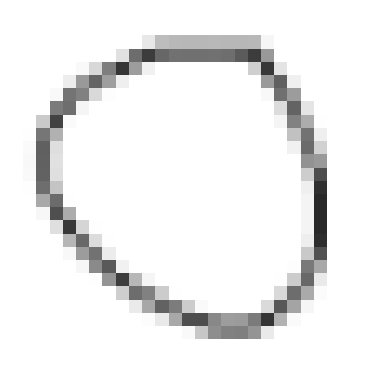

True Label: 0
Predicted Label: 1


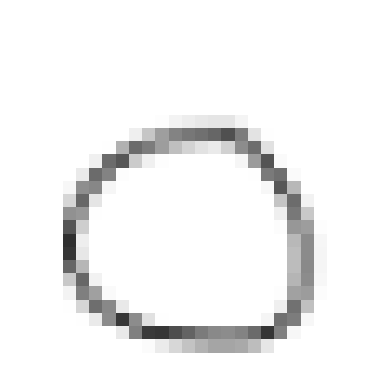

True Label: 0
Predicted Label: 1


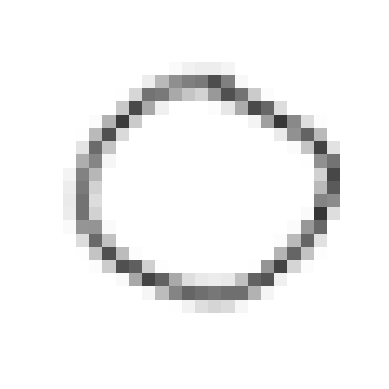

True Label: 0
Predicted Label: 1


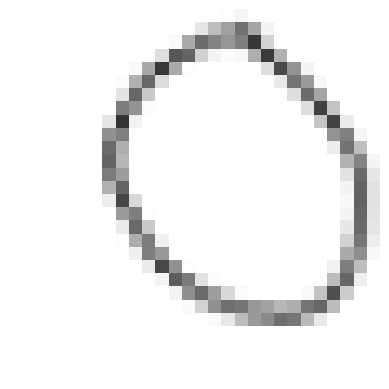

True Label: 0
Predicted Label: 0


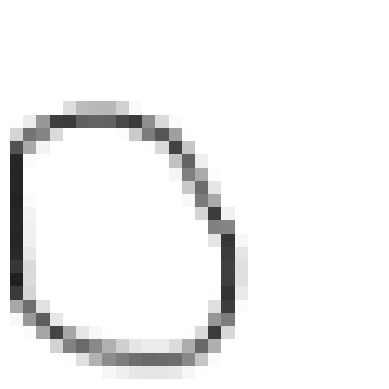

True Label: 0
Predicted Label: 0


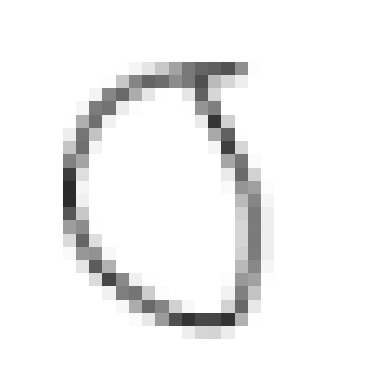

True Label: 0
Predicted Label: 2


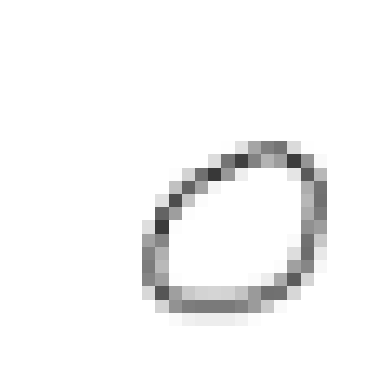

True Label: 0
Predicted Label: 1


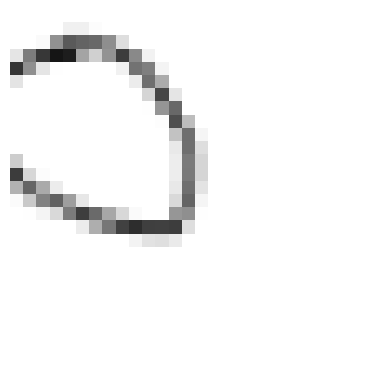

True Label: 0
Predicted Label: 1


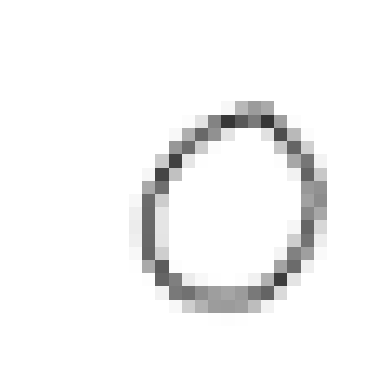

True Label: 0
Predicted Label: 1


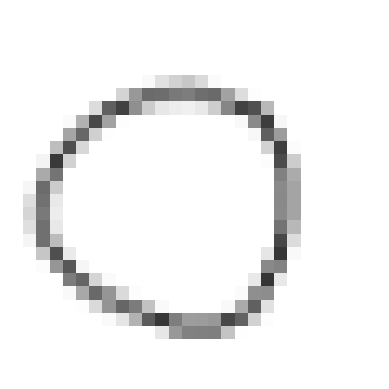

True Label: 0
Predicted Label: 1


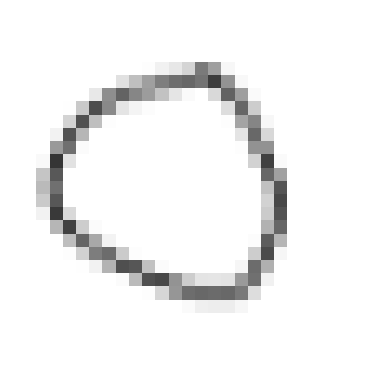

True Label: 0
Predicted Label: 0


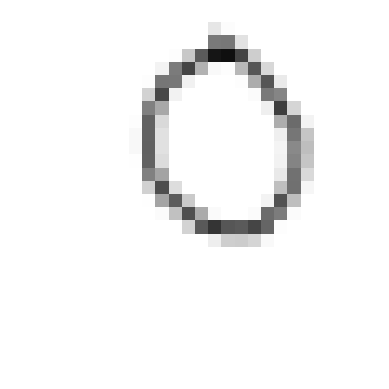

True Label: 0
Predicted Label: 1


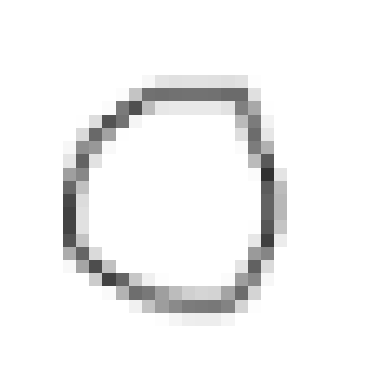

True Label: 0
Predicted Label: 2


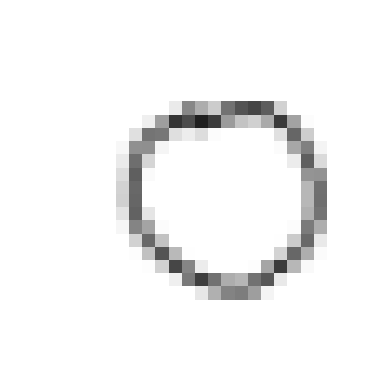

True Label: 0
Predicted Label: 0


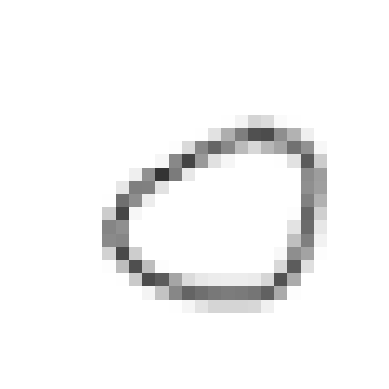

True Label: 0
Predicted Label: 2


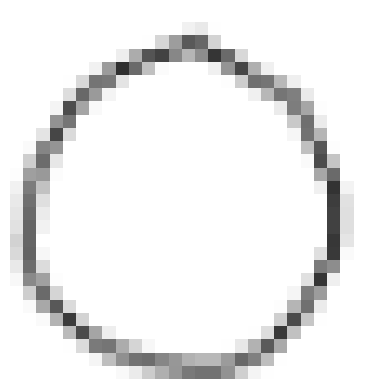

True Label: 0
Predicted Label: 2


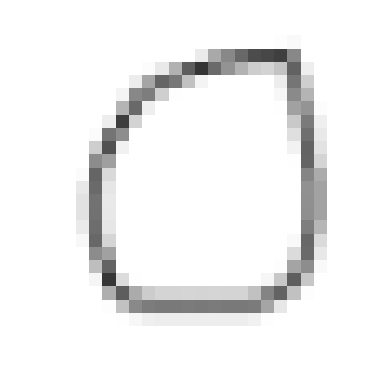

True Label: 0
Predicted Label: 1


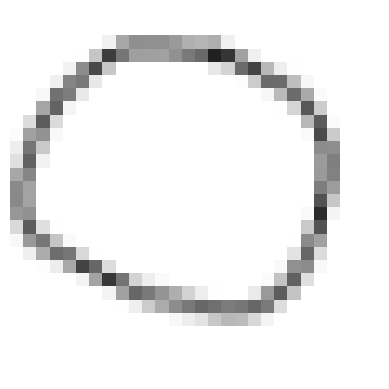

True Label: 0
Predicted Label: 0


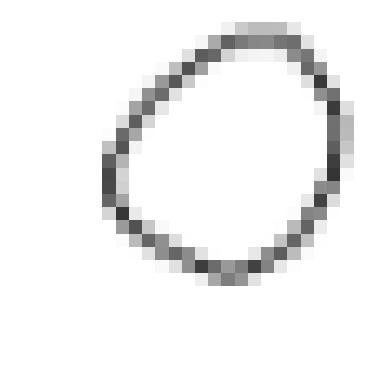

True Label: 0
Predicted Label: 2


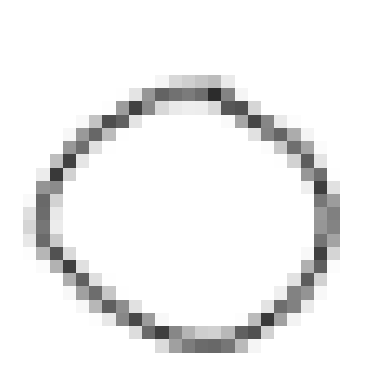

True Label: 1
Predicted Label: 2


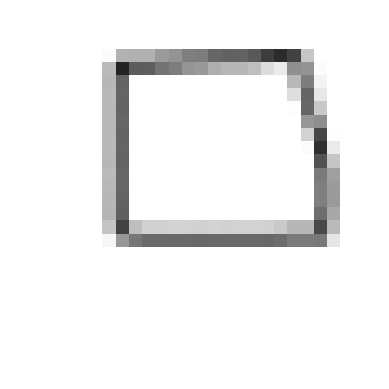

True Label: 1
Predicted Label: 1


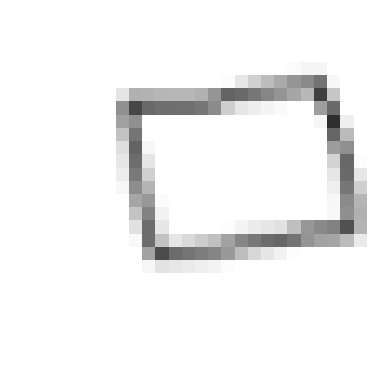

True Label: 1
Predicted Label: 0


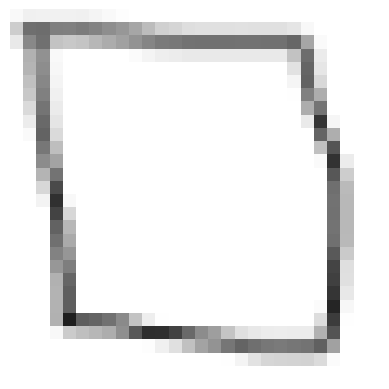

True Label: 1
Predicted Label: 0


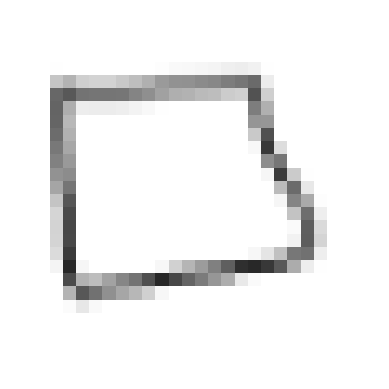

True Label: 1
Predicted Label: 1


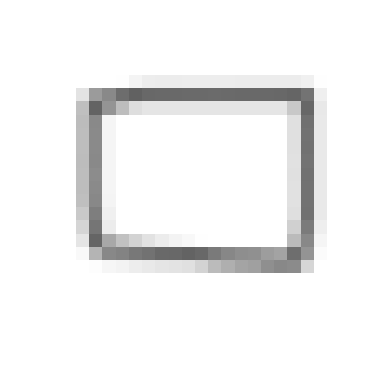

True Label: 1
Predicted Label: 0


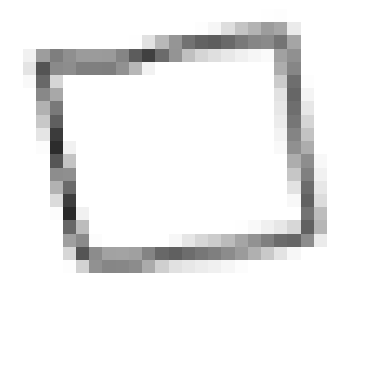

True Label: 1
Predicted Label: 0


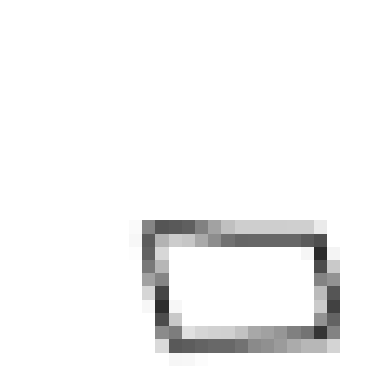

True Label: 1
Predicted Label: 1


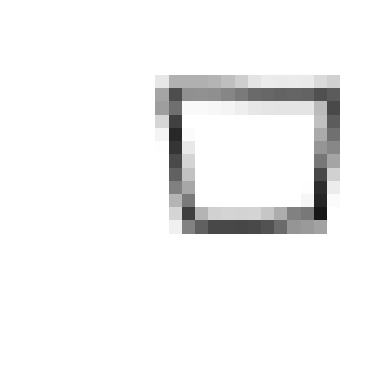

True Label: 1
Predicted Label: 0


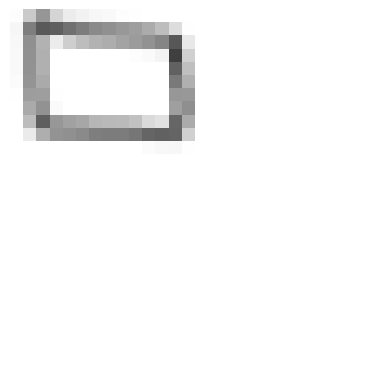

True Label: 1
Predicted Label: 0


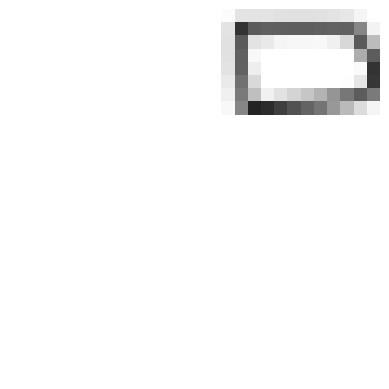

True Label: 1
Predicted Label: 1


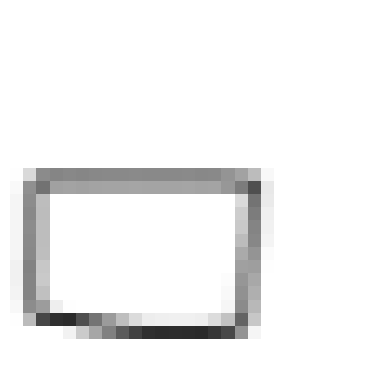

True Label: 1
Predicted Label: 2


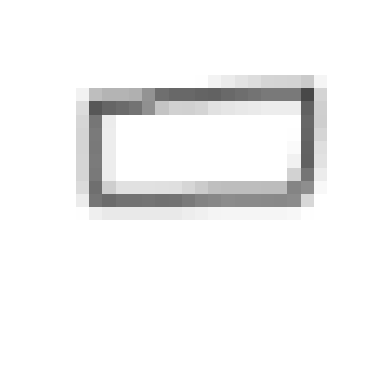

True Label: 1
Predicted Label: 0


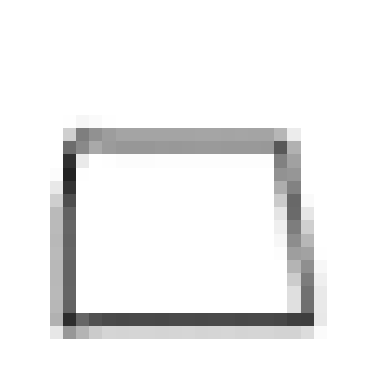

True Label: 1
Predicted Label: 1


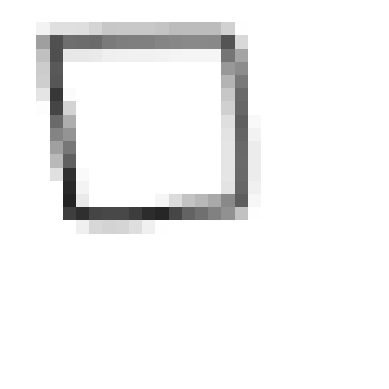

True Label: 1
Predicted Label: 1


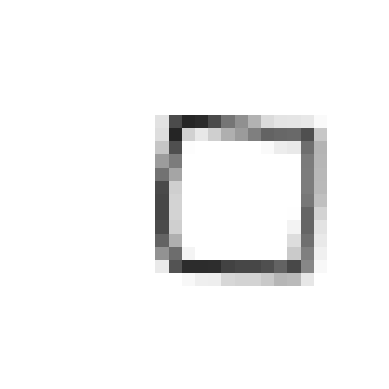

True Label: 1
Predicted Label: 0


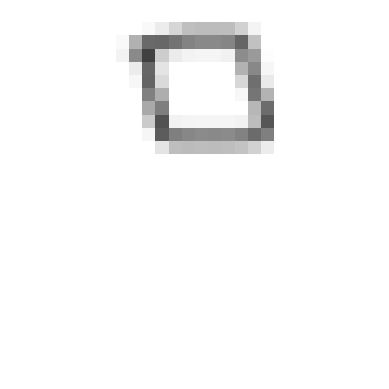

True Label: 1
Predicted Label: 1


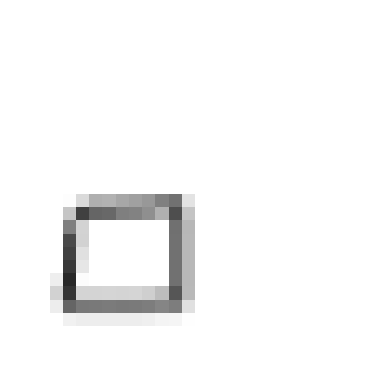

True Label: 1
Predicted Label: 2


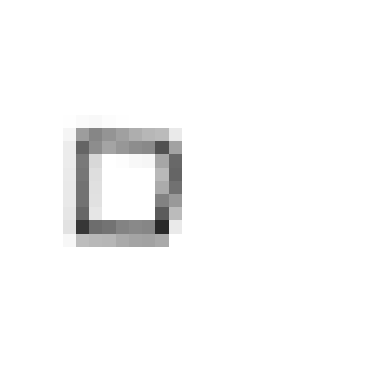

True Label: 1
Predicted Label: 2


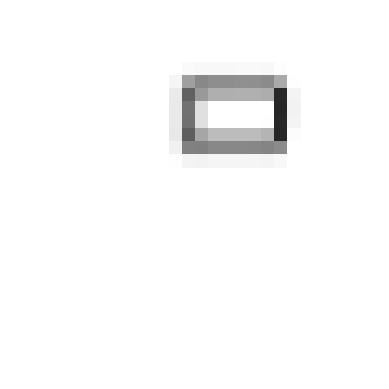

True Label: 1
Predicted Label: 1


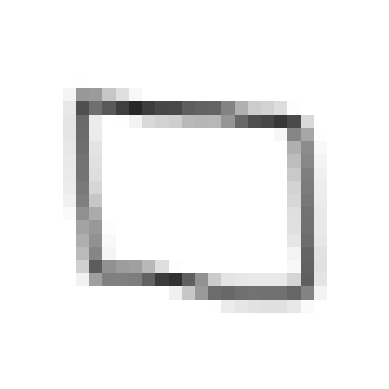

True Label: 2
Predicted Label: 1


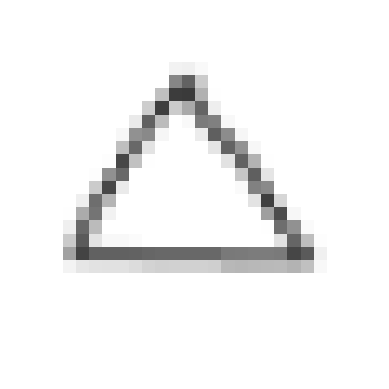

True Label: 2
Predicted Label: 1


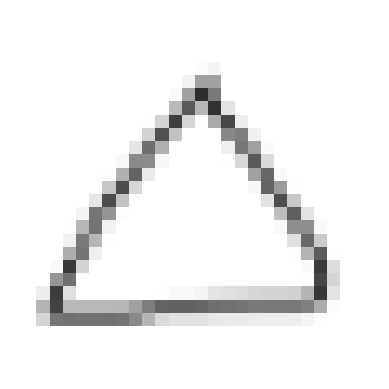

True Label: 2
Predicted Label: 1


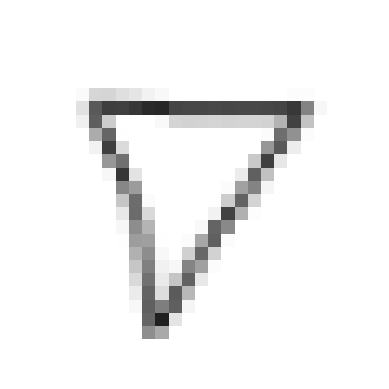

True Label: 2
Predicted Label: 2


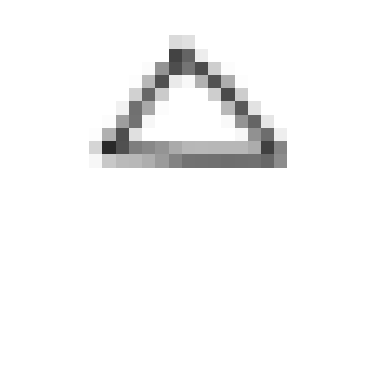

True Label: 2
Predicted Label: 0


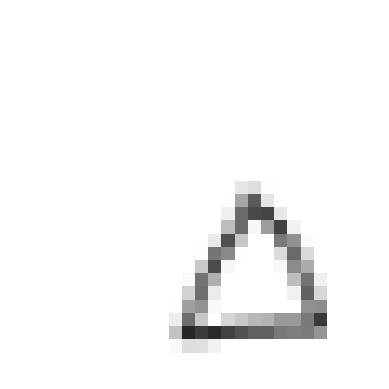

True Label: 2
Predicted Label: 2


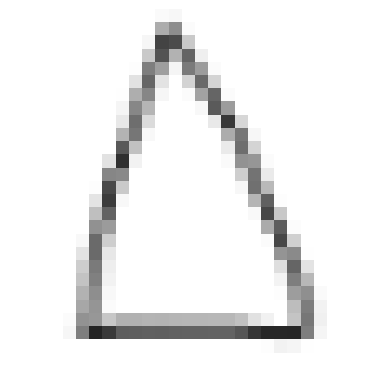

True Label: 2
Predicted Label: 0


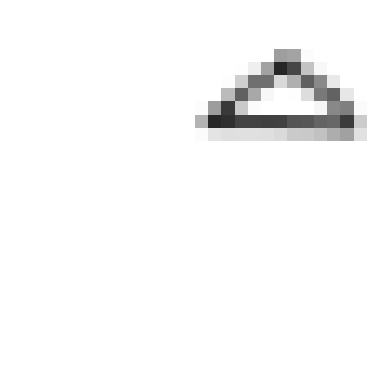

True Label: 2
Predicted Label: 2


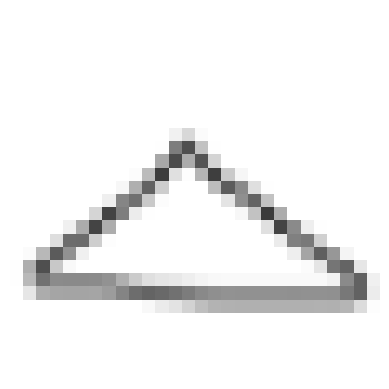

True Label: 2
Predicted Label: 2


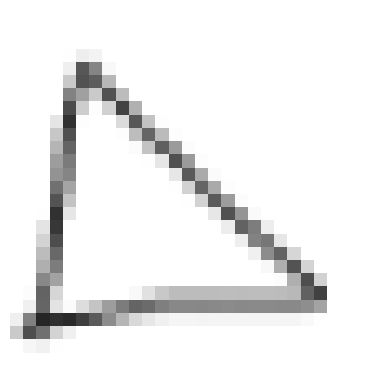

True Label: 2
Predicted Label: 2


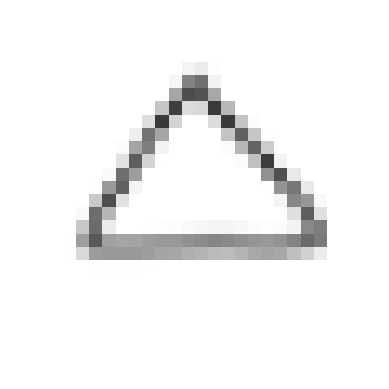

True Label: 2
Predicted Label: 1


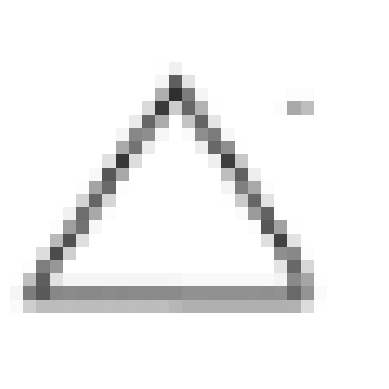

True Label: 2
Predicted Label: 0


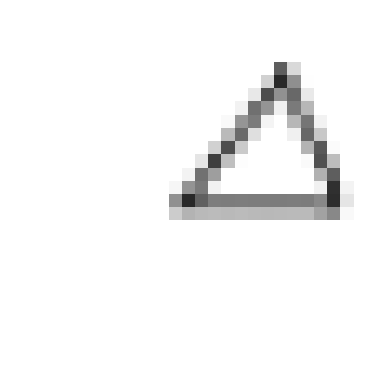

True Label: 2
Predicted Label: 2


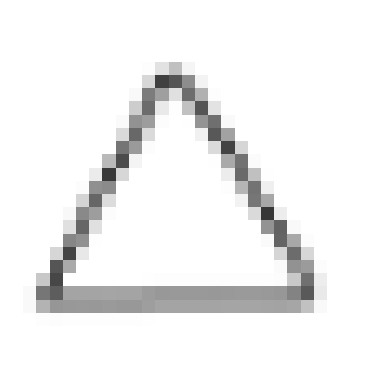

True Label: 2
Predicted Label: 0


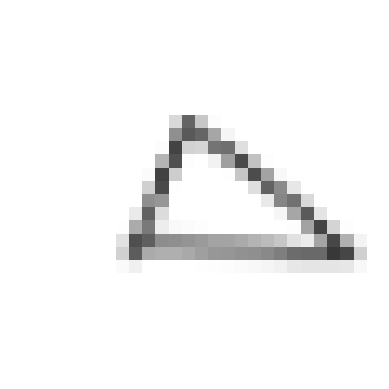

True Label: 2
Predicted Label: 0


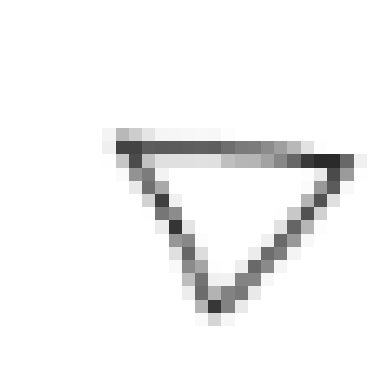

True Label: 2
Predicted Label: 2


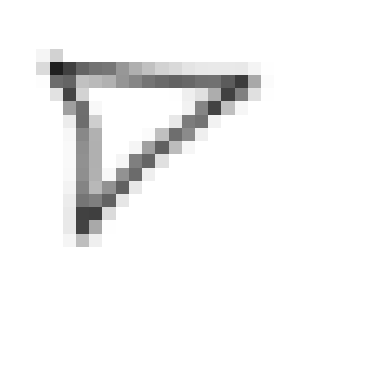

True Label: 2
Predicted Label: 2


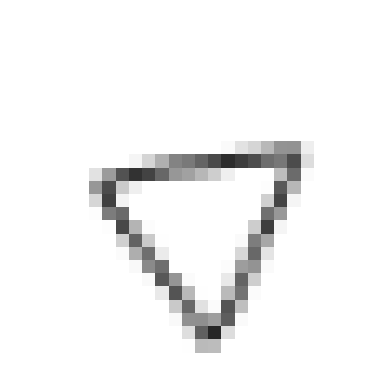

True Label: 2
Predicted Label: 0


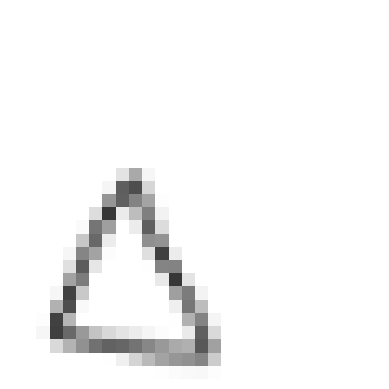

True Label: 2
Predicted Label: 1


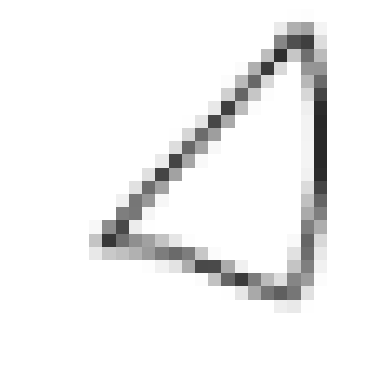

True Label: 2
Predicted Label: 2


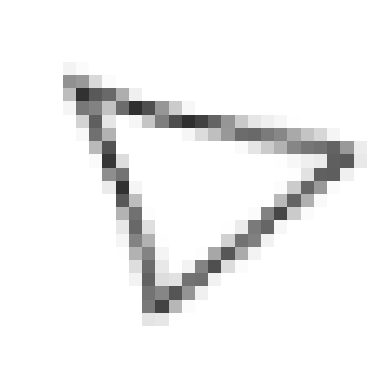

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Generate predictions for the test set
predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Get filenames of the test set
filenames = test_generator.filenames

# Display true and predicted labels along with corresponding images
for i in range(len(true_labels)):
    image_path = 'shapes/' + filenames[i]  # Construct full image path
    img = cv2.imread(image_path)  # Load image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB
    
    # Print true and predicted labels
    print("True Label:", true_labels[i])
    print("Predicted Label:", predicted_labels[i])
    
    # Display image
    plt.imshow(img)
    plt.axis('off')
    plt.show()
